In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload = files.upload()

Saving titanic.csv to titanic (1).csv


In [72]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

print('Survived: %i (%.1f%%)'%(len(survived), float(len(survived))/len(df)*100.00))
print('Not survived: %i (%.1f%%)'%(len(not_survived), float(len(not_survived))/len(df)*100.00))
print('Total: %i' %len(df))

Survived: 342 (38.4%)
Not survived: 549 (61.6%)
Total: 891


---------------------------------------------

Пассажиры более высокого класса имеют большие шансы на спасение

In [11]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [14]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass'>

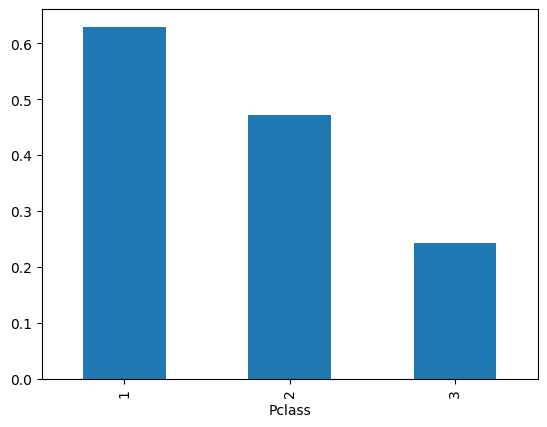

In [15]:
df.groupby('Pclass').Survived.mean().plot(kind="bar")

На основе представленного графика можно увидеть следующую зависимость: в возрастанием класса пассажира, увеличивается его шанс на спасение.

   ---------------------------------------------
   

Женщины имеют большие шансы на спасение

In [16]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [18]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: xlabel='Sex'>

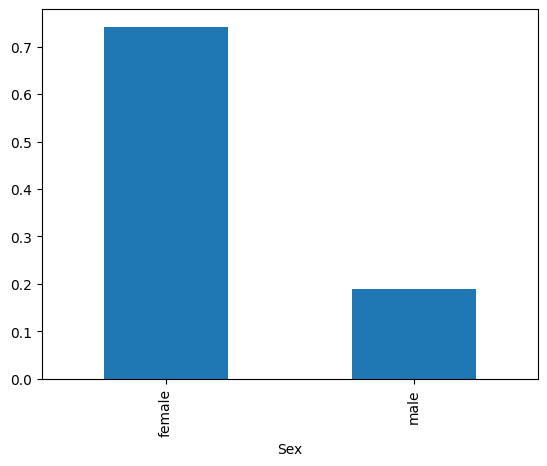

In [19]:
df.groupby('Sex').Survived.mean().plot(kind="bar")

На основе графика можно сделать следующий вывод: шанс выживания для женского пола выше, чем шанс выживания для мужского пола

----------------------------------------------------

Зависимость выживаемости от пола и уровня класса

Гипотеза: зависимость выживания мужчин от уровня класса возрастает, как и у женщин

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

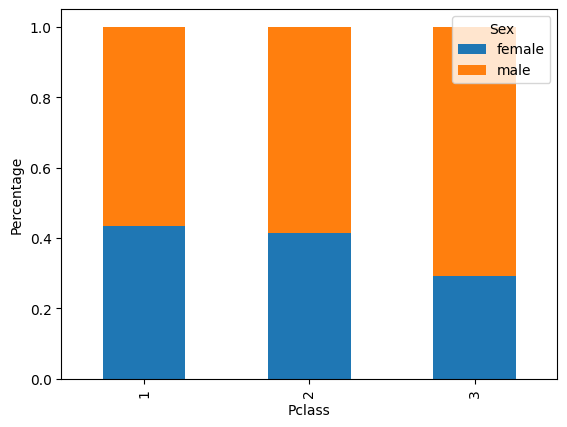

In [21]:
tab = pd.crosstab(df['Pclass'], df['Sex'])
print(tab)

tab.div(tab.sum(1).astype(float),  axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

<Axes: xlabel='Pclass', ylabel='Survived'>

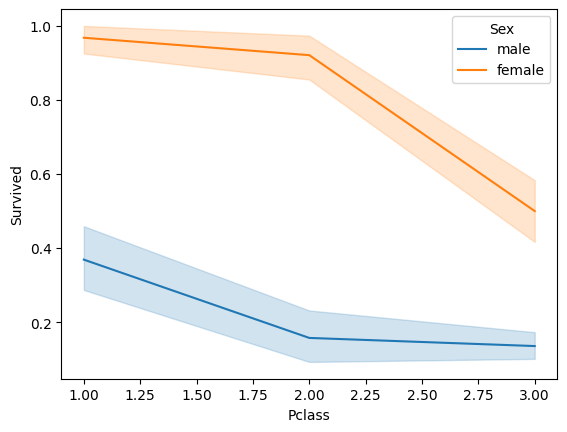

In [23]:
sns.lineplot(data=df, x='Pclass', y='Survived', hue='Sex')

По 1-ому графику можно сделать вывод, что шанс выживаемости женщин и мужчин в зависимости от класс обратен: мужчины с большим шансом выжили в 3 класс, а женщины в 3 классе. Это же доказывает 2 граф.
Гипотеза полностью не подтвердилась: с возрастание класса выживаемость мужчин уменьшается

--------------------------------------------------------

Зависимость выживаемости от родственников 1 порядка

Гипотеза:
Зависимости выживаемости от родственников 1 порядка нет

In [24]:
df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [25]:
df.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

In [26]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<Axes: xlabel='Parch'>

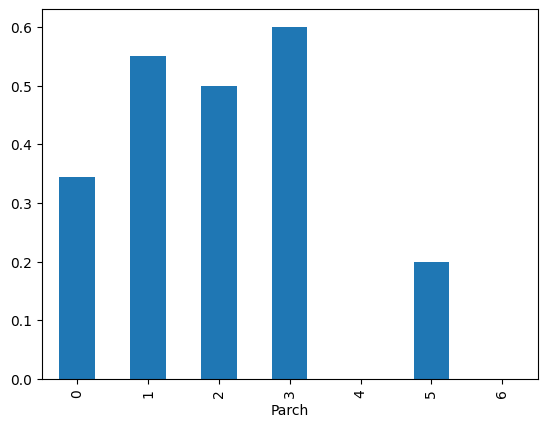

In [27]:
df.groupby('Parch').Survived.mean().plot(kind="bar")

Зависимость выживаемости от количества родственников тригонометрическая: зависимость шанс выживания от количества родственником поочередно увеличивается или уменьшается.
Гипотеза не подтвердилась: зависимость существует

-----------------------------------------------

Зависимость выживаемости от родственников 2 порядка.
Гипотеза: с увеличением родственников 2 порядка, увеличивается шанс на спасение

In [28]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [30]:
df.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

In [31]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Axes: xlabel='SibSp'>

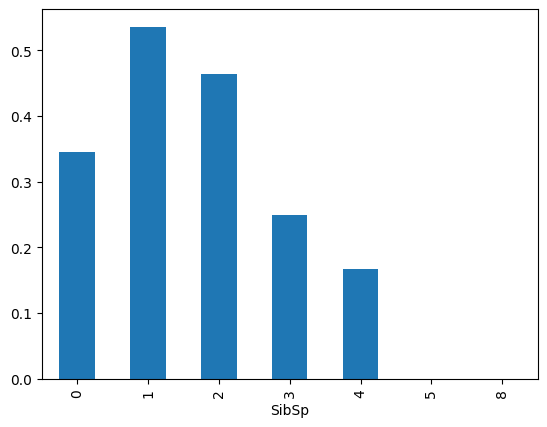

In [32]:
df.groupby('SibSp').Survived.mean().plot(kind="bar")

Шанс выживания возрастает до SibSp = 1. Далее выживаемость уменьшается.
Гипотеза полностью не подтвердилась: увеличение следует только при количестве родственников <= 1

------------------------------

Зависимость выживаемости от возраста

Гипотеза 1: шанс выживания больше у детей и пожилых людей.
Гипотеза 2: шанс выживания у женщин среднего возраста больше среди всех иных возрастов
Гипотеза 3: шанс выживания среди мужчин больше у детей

In [42]:
def paint_plot(subplot, data1, data2, title):
  plt.figure(figsize = [15,5])
  plt.subplot(subplot)
  sns.histplot(data1['Age'].dropna().values, binwidth = 1)
  sns.histplot(data2['Age'].dropna().values, binwidth = 1)
  plt.xlabel('Age')
  plt.title(title)
  plt.legend(['survived', 'not_survived'])

In [34]:
total_survived = df[df['Survived'] == 1]
total_not_survived = df[df['Survived'] == 0]


In [35]:
female_survived = df[(df['Survived'] == 1) & (df['Sex'] == 'female')]
female_not_survived = df[(df['Survived'] == 0) & (df['Sex'] == 'female')]

In [36]:
male_survived = df[(df['Survived'] == 1) & (df['Sex'] == 'male')]
male_not_survived = df[(df['Survived'] == 0) & (df['Sex'] == 'male')]

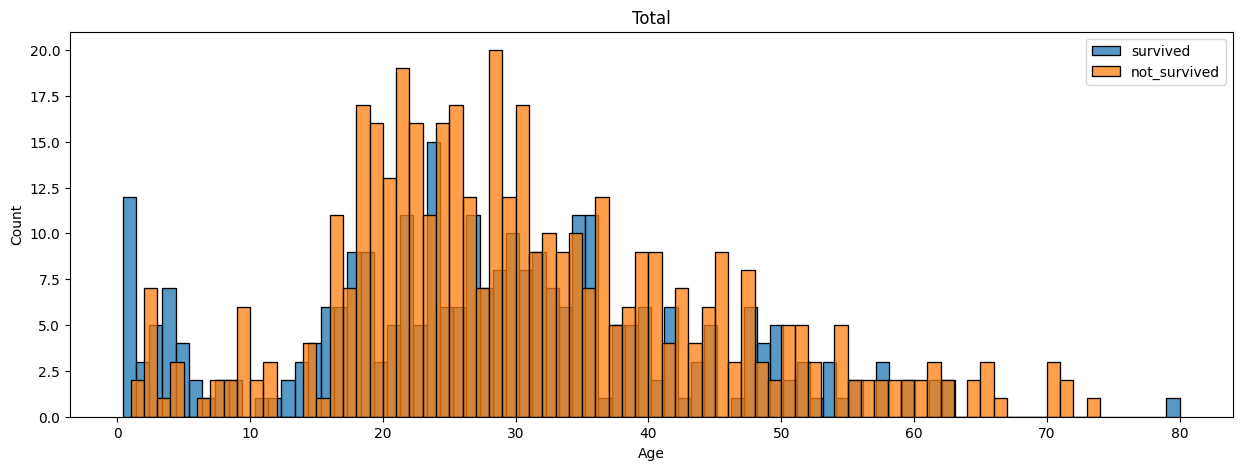

In [43]:
paint_plot(111, total_survived, total_not_survived, 'Total')

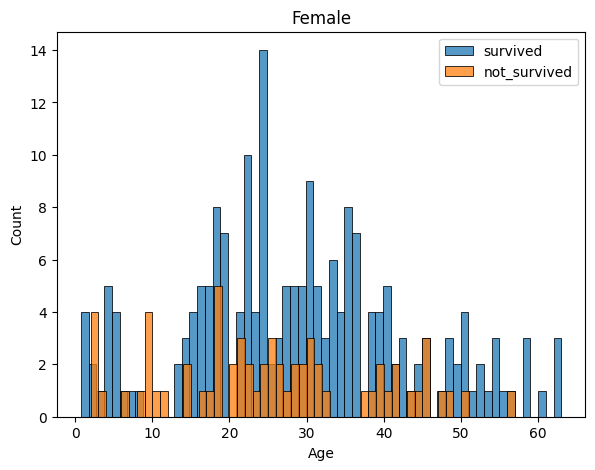

In [45]:
paint_plot(121, female_survived, female_not_survived, 'Female')

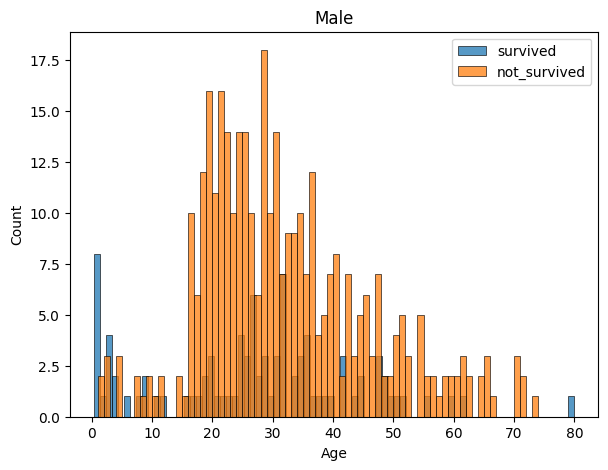

In [47]:
paint_plot(121, male_survived, male_not_survived, 'Male')

Гипотеза 1: подтвердилась частично. Шанс выживания больше только у детей.
Гипотеза 2: подтвердилась полностью (возраст женщин от 18 до 35)
Гипотеза 3: подтвердилась полностью (возраст до 14 лет)

-------------------------------------

<Axes: >

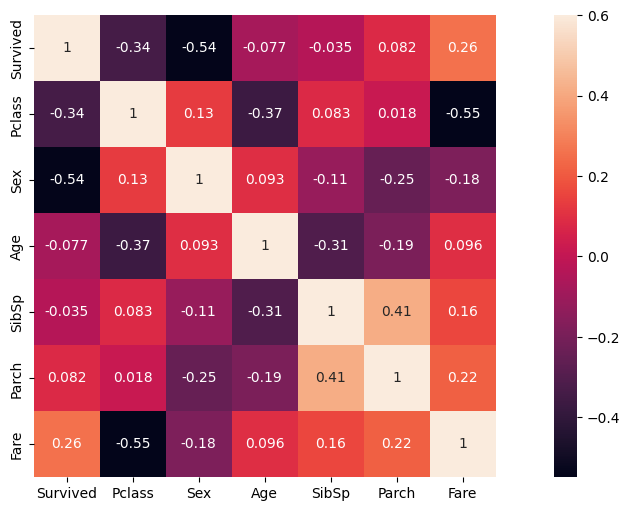

In [83]:
data = df.copy()
data['Sex'] = data['Sex'].replace('male', '1')
data['Sex'] = data['Sex'].replace('female', '0')
df['Sex'] = pd.to_numeric(df['Sex'], errors='ignore')

plt.figure(figsize=(15,6))
sns.heatmap(data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).corr(), vmax=0.6, annot=True, square=True)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [85]:
df.Age


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [86]:
df['Age'].fillna((df['Age'].mean()), inplace=True)

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
X = df.iloc[:,2].values.reshape(-1, 1)
Y = df.iloc[:,1].values

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [95]:
regressor = LinearRegression()

In [96]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [98]:
print('Смещение: ', regressor.intercept_)
print('Коэффициент: ', regressor.coef_[0])

Смещение:  0.8230727403683281
Коэффициент:  -0.18876454394570455


In [99]:
Y_pred = regressor.predict(X_test)

In [100]:
pd.DataFrame({'Действительное': Y_test, "Предсказанное" : Y_pred})

,Действительное,Предсказанное
0,1,0.445544
1,0,0.256779
2,1,0.634308
3,0,0.445544
4,1,0.634308
...,...,...
174,1,0.634308
175,0,0.256779
176,1,0.634308
177,0,0.256779
